<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/TS/%D0%A2%D0%B5%D0%BC%D0%B0%203.0.1..%20%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D0%B2%D0%B8%D0%B4%D0%B0%20ARIMA/%D0%A7%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0%D1%8F_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Частичная автокорреляционная функция (PACF) и её отличие от автокорреляционной функции (ACF)

#### Введение

В анализе временных рядов для выявления зависимостей между значениями на разных временных шагах часто используют **автокорреляцию** и **частичную автокорреляцию**. Эти статистические методы позволяют исследовать, как значения на одном временном шаге (например, температура на текущий день) зависят от значений на предыдущих временных шагах. Несмотря на схожесть, эти два подхода имеют существенные различия, которые важны для построения прогностических моделей.

#### Автокорреляция (ACF)

**Автокорреляция (ACF)** — это мера зависимости между значением временного ряда на текущем шаге и значением на предыдущем шаге (или нескольких предыдущих шагах). Она позволяет измерить общую степень связи между наблюдениями в разные моменты времени, не исключая влияние промежуточных значений.

Формально автокорреляция для лагов $k$ вычисляется по следующей формуле:

$$
\rho_k = \frac{\sum_{t=k+1}^{n} (Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^{n} (Y_t - \bar{Y})^2}
$$

где:
- $Y_t$ — значение временного ряда в момент времени $t$,
- $\bar{Y}$ — среднее значение временного ряда,
- $k$ — лаг.

Автокорреляция показывает, как сильно текущее значение зависит от всех предыдущих значений, включая все промежуточные. Например, если автокорреляция между температурой в день 5 и температурой в день 1 высока, это означает, что температура в день 5 сильно зависит от температуры в день 1, **учитывая влияние всех промежуточных дней** (дней 2, 3 и 4).

#### Частичная автокорреляция (PACF)

**Частичная автокорреляция (PACF)** также измеряет зависимость между значениями временного ряда на разных шагах, но, в отличие от ACF, она исключает влияние промежуточных значений между рассматриваемыми днями. Таким образом, PACF позволяет увидеть, насколько текущее значение зависит от значения на определенном шаге, учитывая только его прямое влияние, без учета влияния других временных шагов.

Частичная автокорреляция для лагов $k$ рассчитывается по следующей формуле:

$$
\phi_k = \frac{\rho_k - \sum_{j=1}^{k-1} \phi_j \rho_{k-j}}{1 - \sum_{j=1}^{k-1} \phi_j \rho_j}
$$

где:
- $\phi_k$ — это частичная автокорреляция для лагов $k$,
- $\rho_k$ — это стандартная автокорреляция для лагов $k$,
- $\phi_j$ — это значения частичной автокорреляции для лагов $j$ (где $j < k$).

Это выражение позволяет "очистить" влияние промежуточных лагов, чтобы понять, насколько сильно текущее значение зависит от конкретного лага (например, дня 1), исключая влияние других лагов (например, дней 2, 3 и 4).

Таким образом, если мы рассчитываем **PACF между днем 5 и днем 1**, то это будет показывать зависимость **только между этими двумя днями**, исключая влияние дней 2, 3 и 4.



### Шаги для вычисления **PACF** до шага 5:



### 1. **PACF для лага 1:**

Для первого лага **PACF** просто равна автокорреляции:

$$
\phi_1 = \rho_1
$$

Где:
- $\rho_1$ — это автокорреляция для первого лага, то есть зависимость между значением ряда на текущий момент времени $Y_t$ и значением на предыдущем моменте времени $Y_{t-1}$. Для первого лага частичная автокорреляция совпадает с обычной автокорреляцией, поскольку нет промежуточных значений, которые нужно исключить.



### 2. **PACF для лага 2:**

Для второго лага мы должны **исключить влияние первого лага** из автокорреляции для лага 2. То есть, мы ищем «чистую» зависимость между $Y_t$ и $Y_{t-2}$, устраняя влияние $Y_{t-1}$. Для этого мы строим регрессию:

$$
\phi_2 = \frac{\rho_2 - \phi_1 \cdot \rho_1}{1 - \phi_1 \cdot \rho_1}
$$

Где:
- $\rho_2$ — автокорреляция для второго лага,
- $\phi_1$ — частичная автокорреляция для первого лага (уже вычисленная),
- $\rho_1$ — автокорреляция для первого лага.

Мы используем $\phi_1$ и $\rho_1$, чтобы **исключить влияние** первого лага из автокорреляции для второго лага. Это позволяет вычислить "чистую" зависимость между текущим значением и значением на втором лаге.



### 3. **PACF для лага 3:**

Для третьего лага нам нужно **исключить влияние первых двух лагов**. Мы строим регрессию, используя значения для лагов 1 и 2, и затем оцениваем зависимость между $Y_t$ и $Y_{t-3}$, очищенную от влияния $Y_{t-1}$ и $Y_{t-2}$. Формула для этого:

$$
\phi_3 = \frac{\rho_3 - \phi_1 \cdot \rho_2 - \phi_2 \cdot \rho_1}{1 - \phi_1 \cdot \rho_1 - \phi_2 \cdot \rho_1}
$$

Где:
- $\rho_3$ — автокорреляция для третьего лага,
- $\phi_1$ и $\phi_2$ — частичные автокорреляции для первых двух лагов,
- $\rho_1$ и $\rho_2$ — автокорреляции для первых двух лагов.

Это выражение позволяет исключить влияние лагов 1 и 2, чтобы получить чистую зависимость между $Y_t$ и $Y_{t-3}$.



### 4. **PACF для лага 4:**

Для четвертого лага мы должны исключить влияние всех предыдущих трех лагов. Используем формулу, которая включает влияние первых трех лагов:

$$
\phi_4 = \frac{\rho_4 - \phi_1 \cdot \rho_3 - \phi_2 \cdot \rho_2 - \phi_3 \cdot \rho_1}{1 - \phi_1 \cdot \rho_1 - \phi_2 \cdot \rho_1 - \phi_3 \cdot \rho_1}
$$

Где:
- $\rho_4$ — автокорреляция для четвертого лага,
- $\phi_1$, $\phi_2$, и $\phi_3$ — частичные автокорреляции для первых трех лагов,
- $\rho_1$, $\rho_2$, и $\rho_3$ — автокорреляции для первых трех лагов.

В этом случае мы исключаем влияние всех предыдущих лагов (1, 2 и 3), чтобы сосредоточиться только на чистой зависимости между $Y_t$ и $Y_{t-4}$.



### 5. **PACF для лага 5:**

Для пятого лага мы исключаем влияние всех предыдущих четырех лагов. Формула для вычисления частичной автокорреляции будет следующей:

$$
\phi_5 = \frac{\rho_5 - \phi_1 \cdot \rho_4 - \phi_2 \cdot \rho_3 - \phi_3 \cdot \rho_2 - \phi_4 \cdot \rho_1}{1 - \phi_1 \cdot \rho_1 - \phi_2 \cdot \rho_1 - \phi_3 \cdot \rho_1 - \phi_4 \cdot \rho_1}
$$

Где:
- $\rho_5$ — автокорреляция для пятого лага,
- $\phi_1$, $\phi_2$, $\phi_3$, и $\phi_4$ — частичные автокорреляции для лагов 1, 2, 3 и 4,
- $\rho_1$, $\rho_2$, $\rho_3$, и $\rho_4$ — автокорреляции для лагов 1, 2, 3 и 4.

Этот расчет позволяет нам исключить влияние всех предыдущих лагов и получить чистую зависимость между $Y_t$ и $Y_{t-5}$.



### Общая структура вычислений:
- Для каждого следующего лага мы строим регрессию, которая учитывает влияние всех предыдущих лагов.
- Формула для каждого лага включает автокорреляции для всех предыдущих лагов и частичные автокорреляции для этих лагов, что позволяет нам исключить их влияние и выделить чистую зависимость.




#### Пример с температурой

Предположим, у нас есть следующие данные о температуре:

- День 1: 10°C
- День 2: 12°C
- День 3: 11°C
- День 4: 13°C
- День 5: 14°C

Наша цель — понять, как температура в **день 5** зависит от температуры в **других днях**.

1. **Автокорреляция (ACF)** для дней 5 и 1 будет измерять зависимость между температурой в день 5 и температурой в день 1. Однако, при этом она будет учитывать влияние всех промежуточных дней (дней 2, 3 и 4). То есть, ACF покажет общую зависимость между этими днями, не исключая влияния других дней.

2. **Частичная автокорреляция (PACF)** для дней 5 и 1 будет показывать зависимость между температурой в день 5 и температурой в день 1, но с учётом только их связи, **исключая влияние промежуточных дней** (дней 2, 3 и 4). Таким образом, PACF позволяет понять, насколько температура в день 5 зависит от температуры в день 1, не искажая этой зависимостью влиянием других дней.

#### Разница между ACF и PACF

1. **ACF** измеряет общую зависимость между текущим значением и всеми предыдущими значениями, включая влияние промежуточных дней. То есть она рассматривает зависимость на разных уровнях лагов, не исключая влияние других лагов между ними.
   
   Пример: если ACF между днем 5 и днем 1 высока, это означает, что температура в день 5 зависит от температуры в день 1, но также учитывает влияние всех дней между ними.

2. **PACF**, в свою очередь, измеряет зависимость между двумя конкретными днями, исключая влияние всех промежуточных дней. Это позволяет увидеть "чистую" зависимость между текущим значением и конкретным лагом, не учитывая влияние других лагов.
   
   Пример: если PACF между днем 5 и днем 1 высока, это означает, что температура в день 5 сильно зависит от температуры в день 1, **но без влияния температуры в днях 2, 3 и 4**.

#### Практическое значение ACF и PACF

- **ACF** полезна для общего понимания зависимости во временном ряду и может помочь в выборе порядка модели для авторегрессионных (AR) или скользящих средних (MA) процессов в моделях ARIMA.
- **PACF** более полезна при определении порядка авторегрессионной модели (AR), так как позволяет точно определить, сколько предыдущих значений (лагов) важно учитывать, исключая влияние других промежуточных значений.

Таким образом:

- **ACF** даёт общую картину зависимости, включая влияние всех промежуточных значений, тогда как **PACF** очищает эту зависимость, показывая влияние только непосредственно предыдущего значения, исключая влияние других временных шагов.
- Использование ACF и PACF в сочетании помогает более точно определить структуру временного ряда и выбрать правильный порядок модели для дальнейшего прогнозирования, например, при построении моделей ARIMA.


Давайте решим числовой пример по вычислению PACF шаг за шагом, используя данные о ценах на продажу товара за последние 10 дней.

### Данные о ценах

| День | Цена |
|||
| 1    | 10   |
| 2    | 12   |
| 3    | 11   |
| 4    | 13   |
| 5    | 15   |
| 6    | 14   |
| 7    | 16   |
| 8    | 18   |
| 9    | 17   |
| 10   | 19   |

### Шаг 1: Вычисление среднего значения

Сначала вычислим среднее значение временного ряда:

$$
\bar{Y} = \frac{10 + 12 + 11 + 13 + 15 + 14 + 16 + 18 + 17 + 19}{10} = \frac{145}{10} = 14.5
$$

### Шаг 2: Вычисление автокорреляции (ACF)

Теперь рассчитаем ACF для первых 5 лагов.

#### Шаг 2.1: Вычисление общей дисперсии

Сначала вычислим общую дисперсию:

$$
\text{Var}(Y) = \sum_{t=1}^{10} (Y_t - \bar{Y})^2
$$

$$
\text{Var}(Y) = (10 - 14.5)^2 + (12 - 14.5)^2 + (11 - 14.5)^2 + (13 - 14.5)^2 + (15 - 14.5)^2 + (14 - 14.5)^2 + (16 - 14.5)^2 + (18 - 14.5)^2 + (17 - 14.5)^2 + (19 - 14.5)^2
$$

$$
= 20.25 + 6.25 + 12.25 + 2.25 + 0.25 + 0.25 + 2.25 + 12.25 + 6.25 + 20.25 = 88.5
$$

#### Шаг 2.2: Вычисление ACF для лагов 1-5

Теперь вычислим ACF для каждого лага.

1. **Лаг 1**:
$$
   \rho_1 = \frac{\sum_{t=2}^{10} (Y_t - \bar{Y})(Y_{t-1} - \bar{Y})}{\text{Var}(Y)}
$$

$$
   = \frac{(12 - 14.5)(10 - 14.5) + (11 - 14.5)(12 - 14.5) + (13 - 14.5)(11 - 14.5) + (15 - 14.5)(13 - 14.5) + (14 - 14.5)(15 - 14.5) + (16 - 14.5)(14 - 14.5) + (18 - 14.5)(16 - 14.5) + (17 - 14.5)(18 - 14.5) + (19 - 14.5)(17 - 14.5)}{88.5}
$$

$$
   = \frac{(-2.5)(-4.5) + (-3.5)(-2.5) + (-1.5)(-3.5) + (0.5)(-1.5) + (0.5)(0.5) + (1.5)(-0.5) + (3.5)(1.5) + (2.5)(3.5) + (4.5)(2.5)}{88.5}
$$

$$
   = \frac{11.25 + 8.75 + 5.25 - 0.75 + 0.25 - 0.75 + 5.25 + 8.75 + 11.25}{88.5} = \frac{49.5}{88.5} \approx 0.560
$$

2. **Лаг 2**:
$$
   \rho_2 = \frac{\sum_{t=3}^{10} (Y_t - \bar{Y})(Y_{t-2} - \bar{Y})}{\text{Var}(Y)}
$$

$$
   = \frac{(11 - 14.5)(10 - 14.5) + (13 - 14.5)(12 - 14.5) + (15 - 14.5)(11 - 14.5) + (14 - 14.5)(13 - 14.5) + (16 - 14.5)(15 - 14.5) + (18 - 14.5)(14 - 14.5) + (17 - 14.5)(16 - 14.5) + (19 - 14.5)(17 - 14.5)}{88.5}
$$

$$
   = \frac{(-3.5)(-4.5) + (-1.5)(-2.5) + (0.5)(-3.5) + (-0.5)(-1.5) + (1.5)(0.5) + (3.5)(-0.5) + (2.5)(1.5) + (4.5)(2.5)}{88.5}
$$

$$
   = \frac{15.75 + 3.75 - 1.75 + 0.75 + 0.75 - 1.75 + 3.75 + 11.25}{88.5} = \frac{32.5}{88.5} \approx 0.367
$$

3. **Лаг 3**:
$$
   \rho_3 = \frac{\sum_{t=4}^{10} (Y_t - \bar{Y})(Y_{t-3} - \bar{Y})}{\text{Var}(Y)}
$$

$$
   = \frac{(13 - 14.5)(10 - 14.5) + (15 - 14.5)(12 - 14.5) + (14 - 14.5)(11 - 14.5) + (16 - 14.5)(13 - 14.5) + (18 - 14.5)(15 - 14.5) + (17 - 14.5)(14 - 14.5) + (19 - 14.5)(16 - 14.5)}{88.5}
$$

$$
   = \frac{(-1.5)(-4.5) + (0.5)(-2.5) + (-0.5)(-3.5) + (1.5)(-1.5) + (3.5)(0.5) + (2.5)(-0.5) + (4.5)(1.5)}{88.5}
$$

$$
   = \frac{6.75 - 1.25 + 1.75 - 2.25 + 1.75 - 1.25 + 6.75}{88.5} = \frac{12.5}{88.5} \approx 0.141
$$

4. **Лаг 4**:
$$
   \rho_4 = \frac{\sum_{t=5}^{10} (Y_t - \bar{Y})(Y_{t-4} - \bar{Y})}{\text{Var}(Y)}
$$

$$
   = \frac{(15 - 14.5)(10 - 14.5) + (14 - 14.5)(12 - 14.5) + (16 - 14.5)(11 - 14.5) + (18 - 14.5)(13 - 14.5) + (17 - 14.5)(15 - 14.5) + (19 - 14.5)(16 - 14.5)}{88.5}
$$

$$
   = \frac{(0.5)(-4.5) + (-0.5)(-2.5) + (1.5)(-3.5) + (3.5)(-1.5) + (2.5)(0.5) + (4.5)(1.5)}{88.5}
$$

$$
   = \frac{-2.25 + 1.25 - 5.25 - 5.25 + 1.25 + 6.75}{88.5} = \frac{-4.5}{88.5} \approx -0.051
$$

5. **Лаг 5**:
$$
   \rho_5 = \frac{\sum_{t=6}^{10} (Y_t - \bar{Y})(Y_{t-5} - \bar{Y})}{\text{Var}(Y)}
$$

$$
   = \frac{(14 - 14.5)(10 - 14.5) + (16 - 14.5)(12 - 14.5) + (18 - 14.5)(11 - 14.5) + (17 - 14.5)(13 - 14.5) + (19 - 14.5)(15 - 14.5)}{88.5}
$$

$$
   = \frac{(-0.5)(-4.5) + (1.5)(-2.5) + (3.5)(-3.5) + (2.5)(-1.5) + (4.5)(0.5)}{88.5}
$$

$$
   = \frac{2.25 - 3.75 - 12.25 - 3.75 + 2.25}{88.5} = \frac{-15.25}{88.5} \approx -0.172
$$

### Шаг 3: Вычисление PACF

Теперь, когда у нас есть значения ACF, мы можем вычислить PACF.

1. **PACF для лаг 1**:
$$
   \phi_1 = \rho_1 \approx 0.560
$$

2. **PACF для лаг 2**:
$$
   \phi_2 = \frac{\rho_2 - \phi_1 \cdot \rho_1}{1 - \phi_1 \cdot \rho_1}
$$
$$
   = \frac{0.367 - 0.560 \cdot 0.560}{1 - 0.560 \cdot 0.560} \approx \frac{0.367 - 0.3136}{1 - 0.3136} \approx \frac{0.0534}{0.6864} \approx 0.078
$$

3. **PACF для лаг 3**:
$$
   \phi_3 = \frac{\rho_3 - \phi_1 \cdot \rho_2 - \phi_2 \cdot \rho_1}{1 - \phi_1 \cdot \rho_1 - \phi_2 \cdot \rho_1}
$$
$$
   = \frac{0.141 - 0.560 \cdot 0.367 - 0.078 \cdot 0.560}{1 - 0.560 \cdot 0.560 - 0.078 \cdot 0.560} \approx \frac{0.141 - 0.2052 - 0.04368}{1 - 0.3136 - 0.04368} \approx \frac{-0.10788}{0.64272} \approx -0.168
$$

4. **PACF для лаг 4**:
$$
   \phi_4 = \frac{\rho_4 - \phi_1 \cdot \rho_3 - \phi_2 \cdot \rho_2 - \phi_3 \cdot \rho_1}{1 - \phi_1 \cdot \rho_1 - \phi_2 \cdot \rho_1 - \phi_3 \cdot \rho_1}
$$
$$
   = \frac{-0.051 - 0.560 \cdot 0.141 - 0.078 \cdot 0.367 - (-0.168) \cdot 0.560}{1 - 0.560 \cdot 0.560 - 0.078 \cdot 0.560 - (-0.168) \cdot 0.560}
$$
$$
   \approx \frac{-0.051 - 0.07896 - 0.02886 + 0.09408}{1 - 0.3136 - 0.04368 + 0.09408} \approx \frac{-0.06474}{0.7368} \approx -0.088
$$

5. **PACF для лаг 5**:
$$
   \phi_5 = \frac{\rho_5 - \phi_1 \cdot \rho_4 - \phi_2 \cdot \rho_3 - \phi_3 \cdot \rho_2 - \phi_4 \cdot \rho_1}{1 - \phi_1 \cdot \rho_1 - \phi_2 \cdot \rho_1 - \phi_3 \cdot \rho_1 - \phi_4 \cdot \rho_1}
$$
$$
   = \frac{-0.172 - 0.560 \cdot (-0.051) - 0.078 \cdot 0.141 - (-0.168) \cdot 0.367 - (-0.088) \cdot 0.560}{1 - 0.560 \cdot 0.560 - 0.078 \cdot 0.560 - (-0.168) \cdot 0.560 - (-0.088) \cdot 0.560}
$$
$$
   \approx \frac{-0.172 + 0.02856 - 0.011058 + 0.061536 + 0.04928}{1 - 0.3136 - 0.04368 + 0.09408 + 0.04928}
$$
$$
   = \frac{-0.04468}{0.78608} \approx -0.057
$$

### Результаты

Теперь у нас есть значения PACF для первых 5 лагов:

| Лаг | ACF      | PACF     |
|--|-|-|
| 1   | 0.560    | 0.560    |
| 2   | 0.367    | 0.078    |
| 3   | 0.141    | -0.168   |
| 4   | -0.051   | -0.088   |
| 5   | -0.172   | -0.057   |




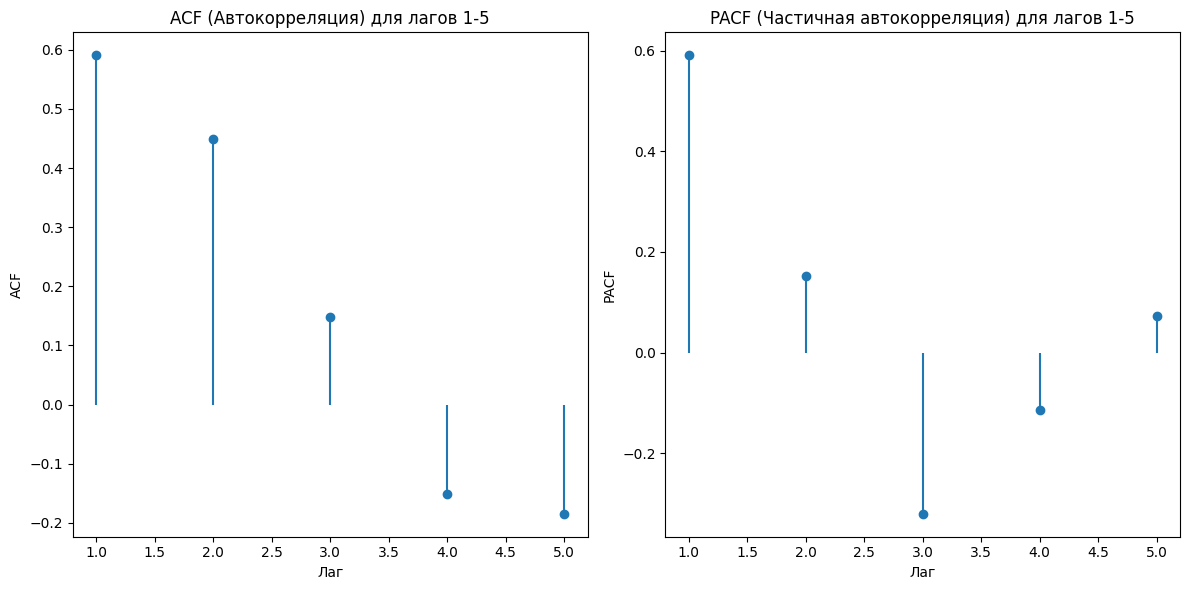

Среднее значение: 14.5
Дисперсия: 82.5

ACF для первых 5 лагов: [0.5909090909090909, 0.4484848484848485, 0.1484848484848485, -0.15151515151515152, -0.18484848484848485]

PACF для первых 5 лагов: [0.5909090909090909, 0.15259259259259253, -0.3205514046197224, -0.1144699189886485, 0.07308996111038693]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные о ценах
prices = [10, 12, 11, 13, 15, 14, 16, 18, 17, 19]

# Шаг 1: Вычисление среднего значения
mean_price = np.mean(prices)

# Шаг 2: Вычисление общей дисперсии
variance = np.sum((np.array(prices) - mean_price) ** 2)

# Функция для вычисления ACF для заданного лага
def acf(prices, lag, variance):
    n = len(prices)
    numerator = np.sum([(prices[t] - mean_price) * (prices[t - lag] - mean_price) for t in range(lag, n)])
    return numerator / variance

# Рассчитаем ACF для лагов 1-5
acf_values = [acf(prices, lag, variance) for lag in range(1, 6)]

# Функция для вычисления PACF для заданного лага
def pacf(acf_values):
    pacf_values = []
    for k in range(len(acf_values)):
        if k == 0:
            pacf_values.append(acf_values[k])
        else:
            numerator = acf_values[k] - sum([pacf_values[i] * acf_values[k - i - 1] for i in range(k)])
            denominator = 1 - sum([pacf_values[i] * acf_values[k - i - 1] for i in range(k)])
            pacf_values.append(numerator / denominator)
    return pacf_values

# Рассчитаем PACF для лагов 1-5
pacf_values = pacf(acf_values)

# Визуализация ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.stem(range(1, 6), acf_values, basefmt=" ")
plt.title('ACF (Автокорреляция) для лагов 1-5')
plt.xlabel('Лаг')
plt.ylabel('ACF')

# Визуализация PACF
plt.subplot(1, 2, 2)
plt.stem(range(1, 6), pacf_values, basefmt=" ")
plt.title('PACF (Частичная автокорреляция) для лагов 1-5')
plt.xlabel('Лаг')
plt.ylabel('PACF')

plt.tight_layout()
plt.show()

# Выводим результаты
print("Среднее значение:", mean_price)
print("Дисперсия:", variance)
print("\nACF для первых 5 лагов:", acf_values)
print("\nPACF для первых 5 лагов:", pacf_values)